In [13]:
# import networkx
import lovelyplots
import networkx as nx
import numpy as np
import rustworkx as rx
import scienceplots
from rustworkx.visualization import graphviz_draw, mpl_draw
from scipy.optimize import minimize

from corral_crowding.allocation_optimizer import GateFidelityOptimizer
from corral_crowding.detuning_fit import compute_infidelity_parameters, decay_fit
from corral_crowding.module_graph import QuantumModuleGraph

Qubit Frequencies: [3.3, 5.7, 4.076, 5.33] GHz
SNAIL Frequency: 4.67 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):2.400000 GHz → Infidelity: 0.007317
  Gate ('Q0', 'Q2'):0.776000 GHz → Infidelity: 0.091992
  Gate ('Q0', 'Q3'):2.030000 GHz → Infidelity: 0.505552
  Gate ('Q1', 'Q2'):1.624000 GHz → Infidelity: 0.517155
  Gate ('Q1', 'Q3'):0.370000 GHz → Infidelity: 0.027192
  Gate ('Q2', 'Q3'):1.254000 GHz → Infidelity: 0.075583

Average Gate Infidelity: 0.084409


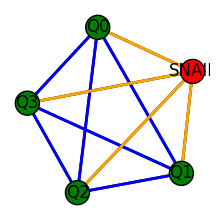

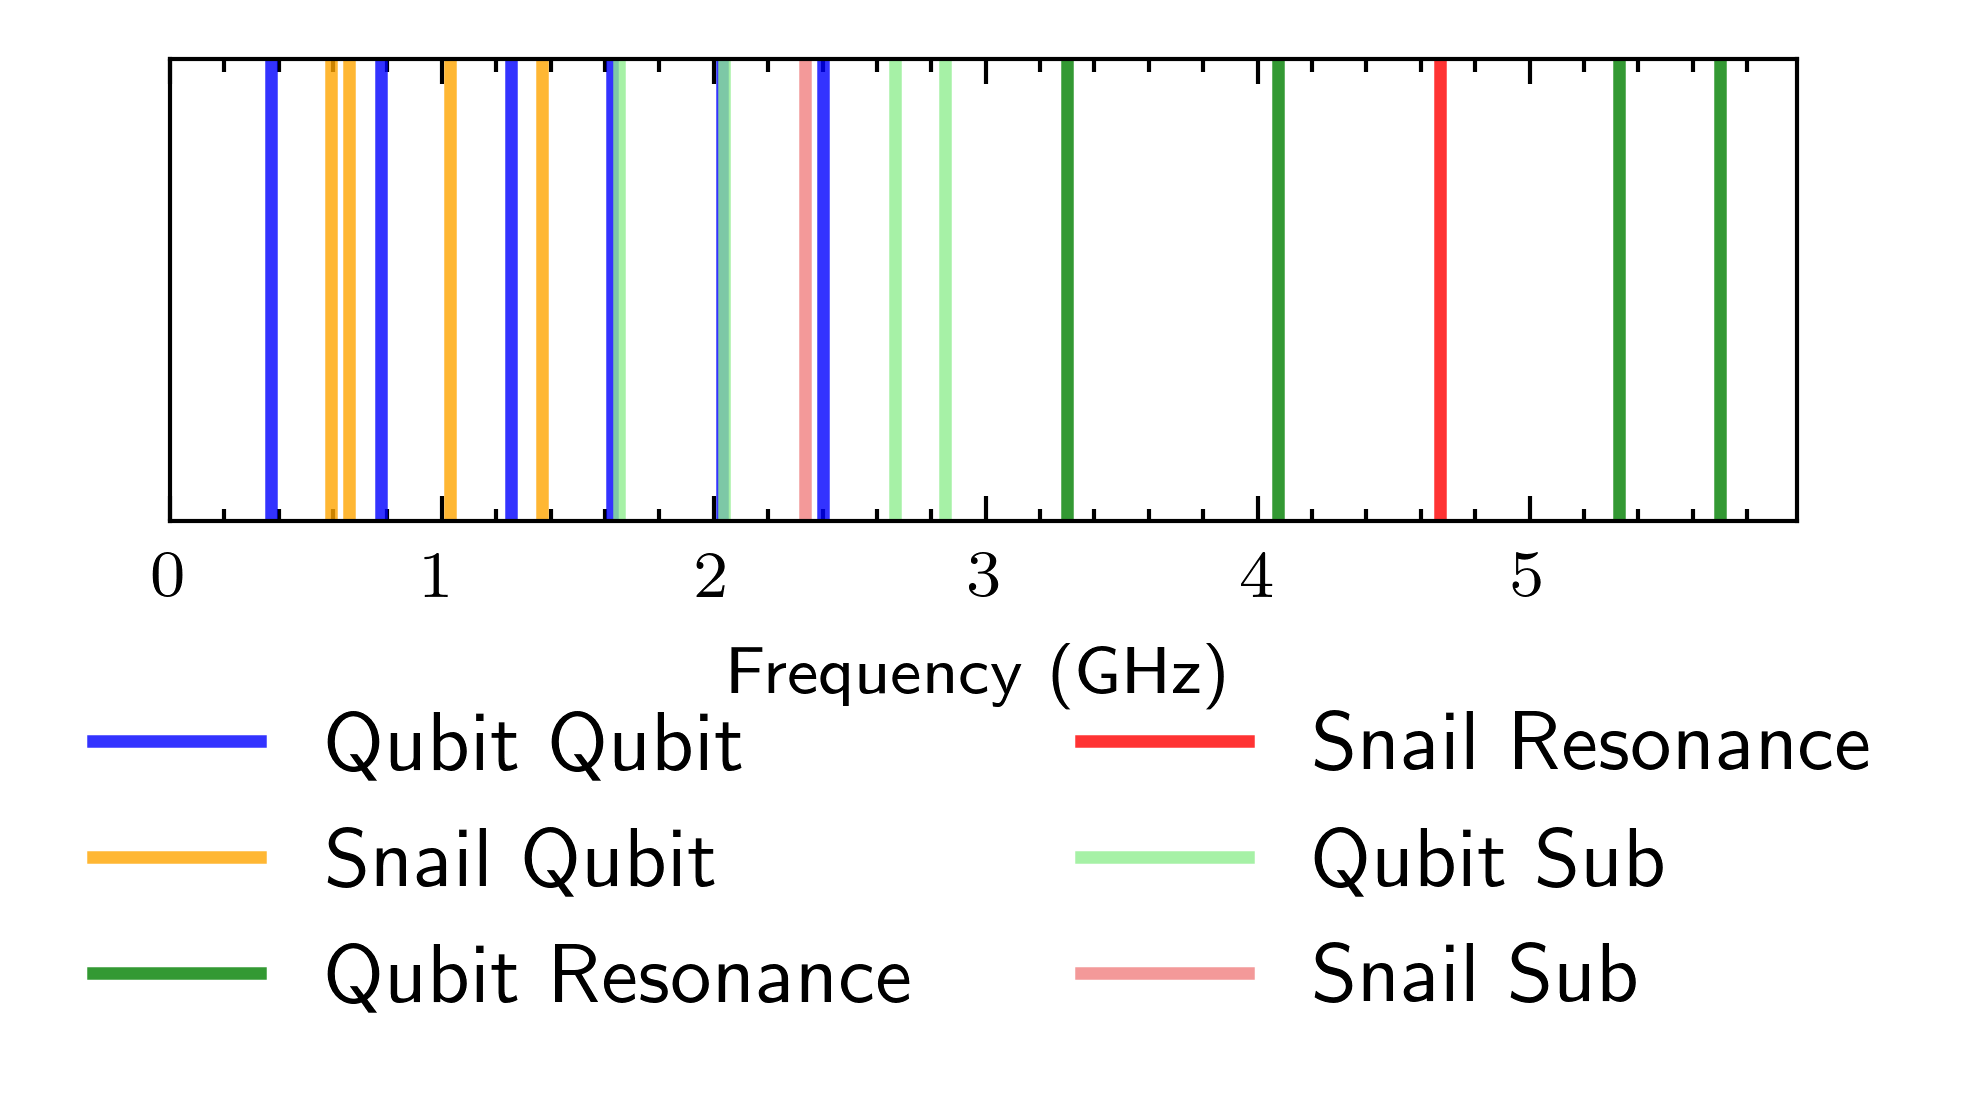

In [18]:
# Example Execution
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
optimizer.best_frequencies = [3.3, 5.7, 4.076, 5.33, 4.67]
optimizer.report_results()

100%|██████████| 64/64 [00:05<00:00, 10.76it/s]


Optimization terminated successfully.
Qubit Frequencies: [5.17984191 3.54516227 5.69986301 5.49985249] GHz
SNAIL Frequency: 4.395013616893157 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):1.634680 GHz → Infidelity: 0.023051
  Gate ('Q0', 'Q2'):0.520021 GHz → Infidelity: 0.021867
  Gate ('Q0', 'Q3'):0.320011 GHz → Infidelity: 0.008723
  Gate ('Q1', 'Q2'):2.154701 GHz → Infidelity: 0.006070
  Gate ('Q1', 'Q3'):1.954690 GHz → Infidelity: 0.011160
  Gate ('Q2', 'Q3'):0.200011 GHz → Infidelity: 0.005967

Average Gate Infidelity: 0.011006


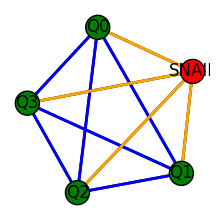

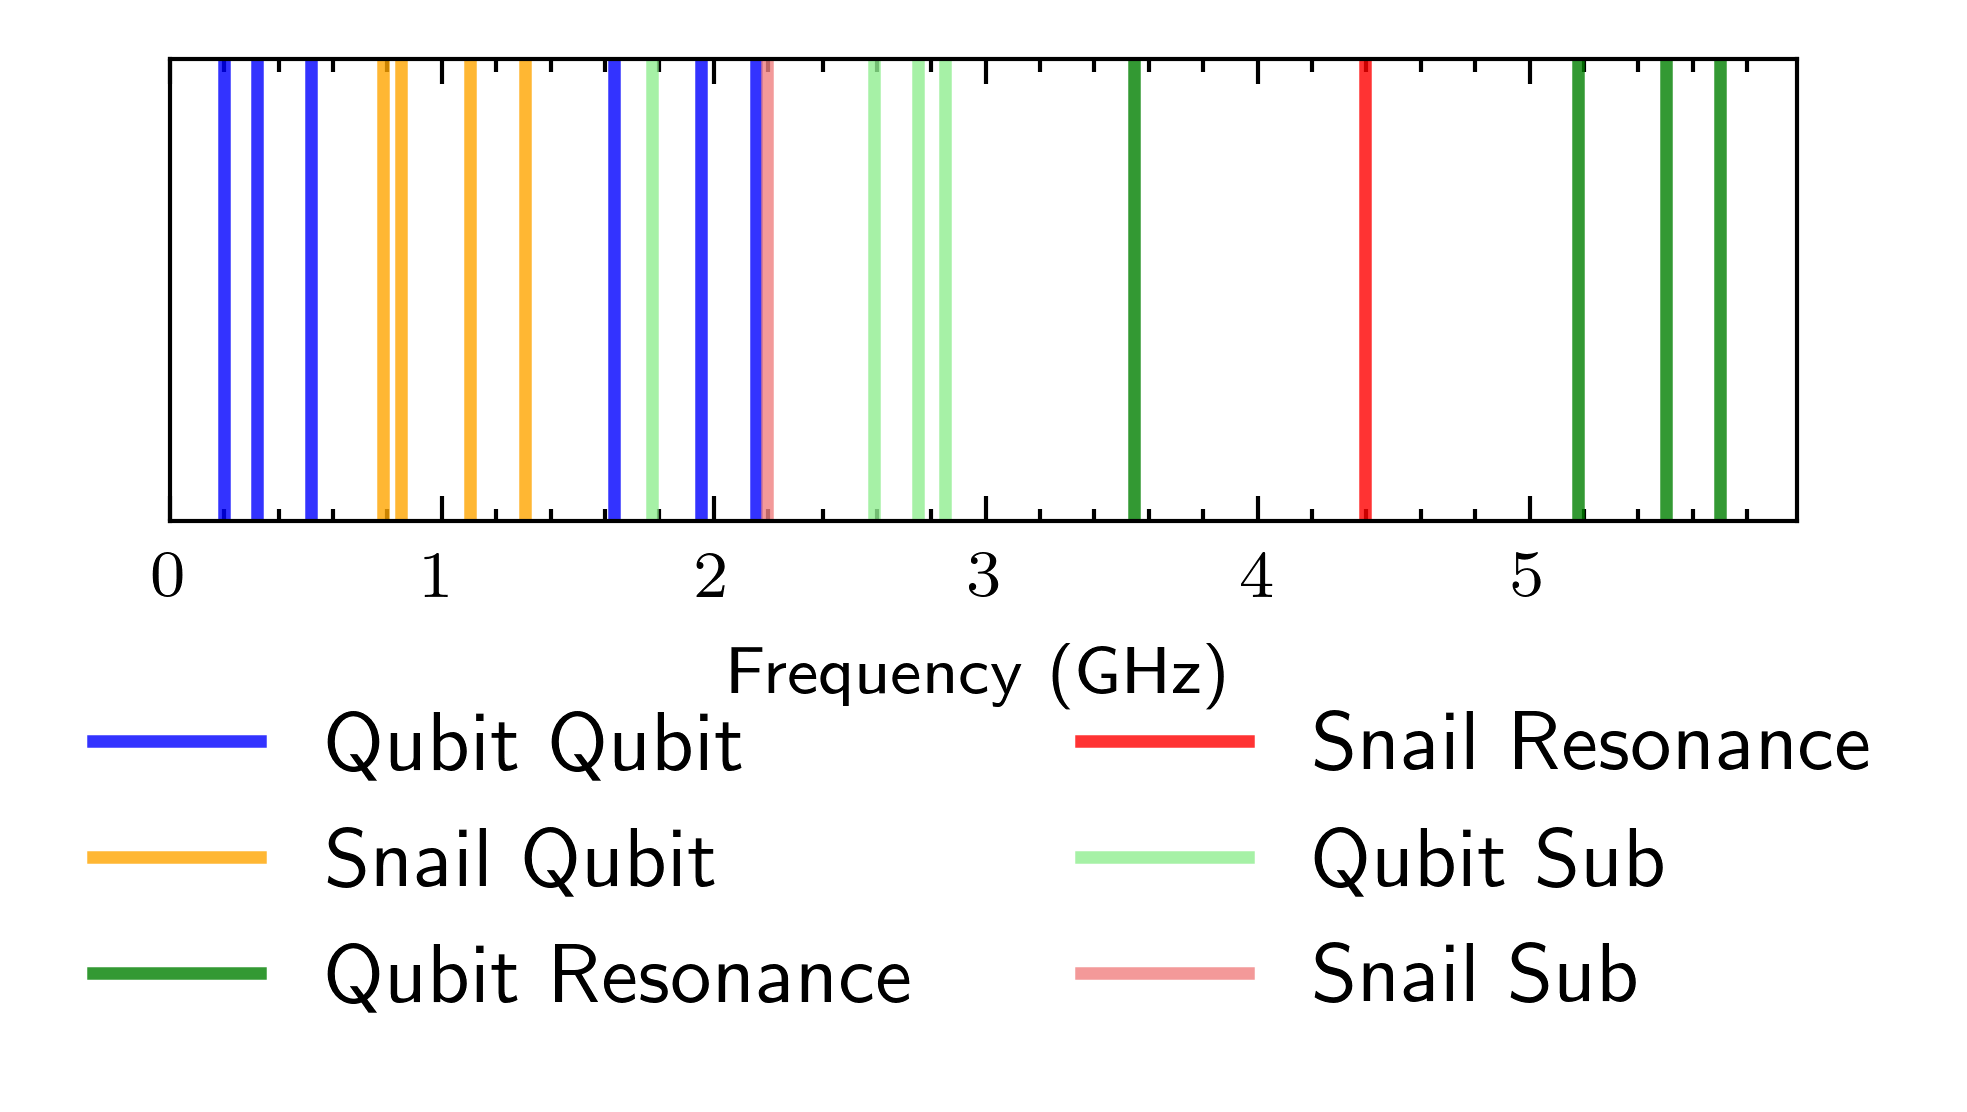

In [24]:
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()